In [140]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [141]:
# to get the input from the given data:
def input_data (data):
    data = np.array(data)
    n = len(data[0])
    # x is from row 0 to m and column 0 to (n-1):
    x = data[:,:n-1]
    # y is the row 0 to m and last column of given data:
    y = data[:,n-1]
    return x,y

## Holdout method:

In [143]:
# if testing size is 30%, use test_size= 0.3
def holdout_method(x,y,test_size):
    # total data sets:
    n = len(y)
    
    # training size= total data sets (1- testing size):
    train_index = int(n*(1-test_size))
   
    # training data set is from index 0 to train_index
    x_for_training = x[:train_index,:]
    # testing data set is from index (train_index) to len(y) i.e. n
    x_for_testing = x[train_index:,:]
    
    # similarly for the y:
    y_for_training = y[:train_index]
    y_for_testing = y[train_index:]
    
    return x_for_training, y_for_training, x_for_testing , y_for_testing

## K-fold method:

In [ ]:
def i_of_k_fold(x, i, k):
    n = len(x)
    l = list(range(n))
    train_index = l[0:n*(i-1)//k] + l[(n*i)//k:n]
    test_index = l[n*(i-1)//k : (n*i)//k ]
    return train_index, test_index

In [144]:
def k_fold(x_train,y_train,k):
    learning_rate_range = [10**i for i in range(-5,3)]
    mean_error_coresponding_to_Learning_Rate = dict()
    for lr in learning_rate_range:
        each_fold_error = [ ]
        for i in range(1, k+1):
            train_index , test_index = i_of_k_fold(x_train, i, k)
            w, w0= gradient_decent(x_train[train_index], y_train[train_index], lr, iteration = 30)
            each_fold_error.append(mean_error(x_train[test_index], y_train[test_index], w, w0))

    mean_error_coresponding_to_Learning_Rate[lr] = sum(each_fold_error)/len(each_fold_error)
    return mean_error_coresponding_to_Learning_Rate, each_fold_error

## Min-Max Normalisation:

In [145]:
def normalise(data):
    data = (data - data.min()) / (data.max() - data.min())
    return data

In [147]:
def error_in_data(x_test, y_test, w, w0):
    m= len(x_test)
    hx = np.dot(x_test,w) + w0
    error = (1/m)*np.sum(np.square(hx - y_test))
    return error

## Linear Regression:

In [ ]:
def linear_reg(x, y, iteration, step_size):
    n= len(x[0])
    m = len(x)
    w = [0]*n
    w0 = 0
    cost = [ ]
    w_list = [ ]
    for i in range(iteration):
        # equation of predicted line y_predicted i.e. h(x)= w0.x0 + w1.x1 + w2.x2 + ...... + wn.xn:
        hx = w0 + np.dot(x,w)
        
        # J(w)= (1/2m)(Sigma(from i=1 to m)(h(x(i)) - y(i))^2) 
        Jw = (1/(2*m))*(np.sum(np.square(y - hx)))
        cost.append(Jw)
        
        err = hx - y
        dw0 = np.sum(err)
        dw = (1/m)*np.dot(err,x)
        
        w = w - step_size*dw
        w0 = w0 - step_size*dw0
        w_list.append(list(w) + [w0])
        
        if Jw <10**-10:
            break
            
    return cost, w_list, w, w0, Jw

## Gradient Decent:

In [149]:
def gradient_decent(x, y, step_size, iteration):
    n= len(x[0])
    w = [0]*n
    w0 = 0
    m = len(x)
    w_list = [ ]
    
    for i in range(iteration):
        
        # equation of predicted line y_predicted i.e. h(x)= w0 + w1.x + w2.x2 + ...... + wn.xn
        hx = w0 + np.dot(x,w)
        
        # (h(x)-y)
        dy = hx - y
        
        # sigma (from i=1 to m) (dy)
        dw0 = np.sum(dy)
        
        # (1/m)(gradient of J wrt w(i) * (x(i)) )
        dw = (1/m)*np.dot(dy,x)
        
        # updating the parameters w0,wi...
        w = w - step_size*dw
        w0 = w0 - step_size*dw0
        
    return w,w0

## Input all data:

In [150]:
# reading the data:
data1= pd.read_csv('data1.csv', header= None)
data2= pd.read_csv('data2.csv', header= None)
data3= pd.read_csv('data3.csv', header= None)
data4= pd.read_csv('data4.csv', header= None)
data5= pd.read_csv('machine.data', header=None)

## Data 1:

Holdout method is used to split the testing and training data. (Testing data is taken 30% and training data is taken 70%).
Linear regression is used in which all the columns except last one is taken a input i.e. X and last column value of both 
data1 and data2 is taken as output Y.
First a y_predicted is calculated from parameters w0 and w (intially taken as 0) and then cost function is calculated. Using
which we modified the parameter with each iteration. And when we get near perfect value of cost function we terminate the 
function and get the final regression line. To check the performance we calculate the square mean error. 

In [151]:
data1.head()

,0,1
0,0.45478,3.18270
1,-0.31160,0.34708
2,0.94642,5.00180
3,0.33790,2.75020
4,0.23853,2.38260


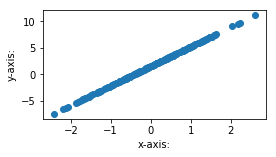

In [153]:
x1, y1= input_data(data1)
fig= plt.figure(figsize= (4,2))
plt.scatter(x,y)
plt.xlabel('x-axis:')
plt.ylabel('y-axis:')
plt.show()

In [154]:
# separating the data sets for training and testing purpose:
x_train, y_train, x_test, y_test = holdout_method(x1, y1, 0.3) 

In [155]:
# doing linear regression:
cost_data1, w_list_data1, w_data1, w0_data1, final_cost_data1 = linear_reg(x_train, y_train, 1000, 0.01)
print(w_data1)
print(w0_data1)

[3.69954076]
1.5000355447001341


In [156]:
# calculating the error in data1:
error = error_in_data(x_test, y_test, w_data1, w0_data1)
print("Mean error in data1:\t", error)

Mean error in data1:	 2.2266224956172895e-07


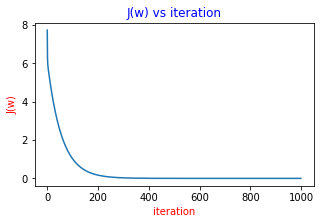

Wall time: 1.58 s


In [157]:
%%time 

# J(w) vs iteration for data1:
fig= plt.figure(figsize=(5,3))
i = list(range(len(cost_data1)))
plt.xlabel('iteration', color= 'red')
plt.ylabel('J(w)', color= 'red')
plt.title('J(w) vs iteration', color= 'blue')
plt.plot(i, cost_data1)
plt.show()

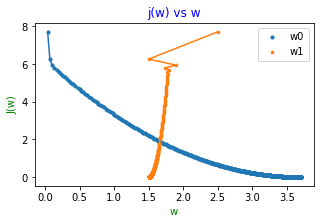

In [159]:
# j(w) vs w for data1:
fig= plt.figure(figsize= (5,3))
plt.xlabel("w", color= 'green')
plt.ylabel("J(w)", color= 'green')
plt.title('j(w) vs w', color= 'blue')
w0_d1 = np.array(w_list_data1)[:,0]
w_d1 = np.array(w_list_data1)[:,1]
plt.scatter(w0_d1, cost_data1, s=10, label='w0')
plt.scatter(w_d1, cost_data1, s=10, marker="*", label='w1')
plt.plot(w0_d1, cost_data1)
plt.plot(w_d1, cost_data1)
plt.legend()
plt.show()

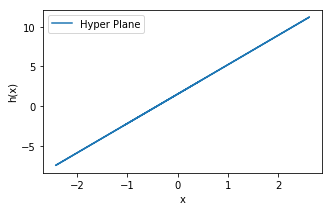

In [160]:
# hyperplane:
eq_hyp = w0_data1 + data1[0]*w_data1
fig= plt.figure(figsize=(5,3))
plt.plot(data1[0], eq_hyp, label="Hyper Plane")
plt.legend()
plt.xlabel('x')
plt.ylabel('h(x)')
plt.show()

In [161]:
print(f"The parameters of the model are:\t w= {w_data1} \t w0= {w0_data1} \t cost= {final_cost_data1}")

# Parameters of the Model:
print("\nThe parameters of the model")
print("y= {} + {} w1".format(str(w0_data1), str(w_data1)))

The parameters of the model are:	 w= [3.69954076] 	 w0= 1.5000355447001341 	 cost= 1.0015960553542546e-07

The parameters of the model
y= 1.5000355447001341 + [3.69954076] w1


## Data 2:

In [162]:
data2.head()

,0,1,2
0,607,379,-1318.4
1,402,746,-867.4
2,935,175,-2040.0
3,963,809,-2101.6
4,486,17,-1052.2


In [163]:
x2, y2= input_data(data2)

In [166]:
x_train, y_train, x_test, y_test = holdout_method(x2, y2, 0.3) 

In [172]:
normal_data2 = normalise(data2)
x2_norm, y2_norm = input_data(normal_data2) 
x_train, y_train ,x_test , y_test = holdout_method(x2_norm, y2_norm, 0.3)

In [173]:
cost_data2, w_list_data2, w_data2, w0_data2, final_cost_data2 = linear_reg(x_train, y_train, 1000, 0.001)

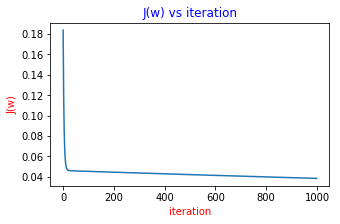

In [174]:
# J(w) vs iteration for data2:

fig= plt.figure(figsize=(5,3))
i = list(range(len(cost_data2)))
plt.xlabel('iteration', color= 'red')
plt.ylabel('J(w)', color= 'red')
plt.title('J(w) vs iteration', color= 'blue')
plt.plot(i, cost_data2)
plt.show()

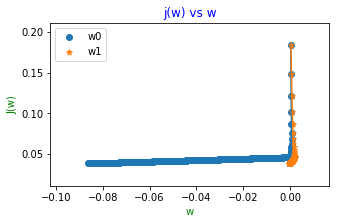

In [175]:
# j(w) vs w for data2:

fig= plt.figure(figsize= (5,3))
plt.xlabel("w", color= 'green')
plt.ylabel("J(w)", color= 'green')
plt.title("j(w) vs w", color= 'blue')
w0_d2 = np.array(w_list_data2)[:,0]
w1_d2 = np.array(w_list_data2)[:,1]
plt.scatter(w0_d2, cost_data2, label='w0')
plt.scatter(w1_d2, cost_data2, marker="*", label='w1')
plt.plot(w0_d2, cost_data2)
plt.plot(w1_d2, cost_data2)
plt.legend()
plt.show()

In [176]:
print(f"The parameters of the model are:\t w= {w_data2} \t w0= {w0_data2} \t cost= {final_cost_data2}")

The parameters of the model are:	 w= [-0.08606712 -0.00053352] 	 w0= 0.5659311658661651 	 cost= 0.03839420699336668


## Data3:

In [192]:
x3, y3= input_data(data3)

In [193]:
data3.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-0.20194,1.20030,1.58980,-1.598800,-0.16687,0.18943,-1.20490,0.33534,-0.69619,2.16430,...,-1.42180,0.78505,0.70262,-2.353700,1.394700,0.350110,2.084900,-1.487400,-0.62893,52.000
1,0.86107,-0.10728,-2.03180,-0.846320,0.14752,0.11857,0.85306,-0.59189,-0.26797,1.65540,...,0.48337,0.91948,0.68379,-0.253330,0.032124,1.173800,1.550900,-0.411230,0.23187,10.378
2,1.55820,0.61950,2.35520,0.044202,-1.07630,2.44090,-0.30732,0.62645,-0.33881,0.06896,...,0.21967,-0.23811,0.70586,2.390900,0.729670,-0.448490,0.940510,0.005634,-0.19214,183.330
3,-0.12968,1.09100,0.76404,-0.057685,-0.10341,0.67060,0.24801,-0.69294,1.32640,-1.00900,...,1.11410,0.99151,0.17876,0.027139,0.510250,-0.628680,-0.179560,0.615190,-0.46937,-37.408
4,-0.81777,-0.44203,-2.11470,-0.122620,-0.31536,-0.67953,0.60266,-0.83188,-0.44757,-0.58308,...,0.52212,-0.19912,0.29868,-0.556280,1.257500,-0.097418,0.051225,0.962500,1.47100,-49.237


In [200]:
x_train, y_train ,x_test , y_test = holdout_method(x3, y3, 0.3)

In [201]:
%%time

# Finding parameters through indirect method:
cost_data3, w_list_data3, w_data3, w0_data3, final_cost_data3 = linear_reg(x_train, y_train, 1000, 0.001)

Wall time: 1.62 s


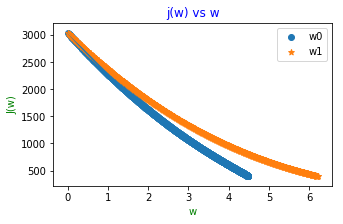

In [202]:
# j(w) vs w for data3:

fig= plt.figure(figsize= (5,3))
plt.xlabel("w", color= 'green')
plt.ylabel("J(w)", color= 'green')
plt.title('j(w) vs w', color= 'blue')
w0_d3 = np.array(w_list_data3)[:,0]
w1_d3 = np.array(w_list_data3)[:,1]
plt.scatter(w0_d3, cost_data3, label='w0')
plt.scatter(w1_d3, cost_data3, marker="*", label='w1')
plt.plot(w0_d3, cost_data3)
plt.plot(w1_d3, cost_data3)
plt.legend()
plt.show()

In [207]:
%%time

# Finding parameters through direct method:
theta_cap = np.linalg.inv((x_train.T).dot(x_train)).dot(x_train.T).dot(y_train)
print(theta_cap)

[ 3.00019791 13.00021757  4.0001188   7.99959176 10.99989549 18.00003055
 14.00013291 15.99977353  2.99999798 11.0002322  18.0001851   2.99997789
 12.99988306  1.99995409  8.99993559 15.00000357  2.99987375 17.00005632
 12.99994408 17.9997249  12.9999241   9.00015804 13.00002745 10.00030561
  2.00012271 13.000131   19.99979324 10.00032546 13.00005014 12.00008945
  5.00013459 14.00053619  4.00022157 16.00023235  5.00006319  4.00007846
 14.9998768   5.99995668  4.00015016 12.99966581  6.00003604  6.00002903
 16.99962062  7.99960157  3.0003108   3.99985089  8.00017733 18.00021662
 11.99998713  6.00000405]
Wall time: 56 ms


Through direct method the time taken is in 'ms' and through indirect method the time taken is in 'sec'.

In [189]:
print(f"The parameters of the model are:\t w= {w_data3} \t w0= {w0_data3} \t cost= {final_cost_data3}")

The parameters of the model are:	 w= [ 4.48309763  6.21025969  3.98486775  5.56651607  4.15894196 11.36342958
  5.65981305  8.47190488  4.11760715  6.91629567  6.47473     1.19067321
  8.52430225  1.08410993  7.50274788  5.379818    4.75344954 11.55297624
  6.30706223 15.4739259   6.97705928  7.24404251  1.90008477  1.00191665
  2.31716697  6.9536263  11.84774646  3.36292104  8.59686051  5.82549845
  3.75082722  6.85070112  1.29577255 10.9684056   6.5944612   0.99391271
  7.33365581  6.8724735  -2.64766185  8.51172817 -1.29663233  2.50777837
  8.84556519 11.03453644  3.75839761  4.40678981  3.32117047  6.43056795
  7.75582074 -1.5996411 ] 	 w0= 2.318493806802443 	 cost= 399.3477258307547


## Data 4:

In [190]:
data4.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,-0.003780,0.031027,-0.388220,1.42080,-0.78641,0.984240,0.75169,-1.158100,-0.55794,-0.658210,...,-0.62419,-0.84155,-0.79758,1.87690,-2.00010,-0.19268,1.63860,-0.59015,-0.42054,-839.430
1,-0.036043,-1.159100,0.219710,-0.95231,-0.50804,0.067726,1.12300,1.269000,2.18280,0.172510,...,0.77773,-1.75710,1.14450,1.01170,-0.31249,0.40022,-1.05920,-0.45485,-0.34847,62.063
2,-0.438100,-0.733720,-0.089075,1.22010,-1.40850,0.971640,1.13360,-0.406290,-0.64220,0.145740,...,-1.12920,-0.69191,-1.89440,-0.42760,0.33931,-0.72165,0.22623,0.26848,0.24492,115.990
3,-0.572800,-0.251010,-1.052400,0.37794,1.46930,-0.099663,2.48980,-0.041293,0.99387,-0.040381,...,0.24356,-1.07830,-1.69030,0.79401,0.32061,-0.35921,0.33322,1.39690,0.86721,101.340
4,-0.129100,1.506500,0.532350,-0.76057,-1.67030,-0.714710,1.87340,-0.842890,0.33552,-0.884650,...,-0.66104,0.94924,1.88560,-1.78200,0.76805,1.90530,1.01890,-0.85400,-0.17766,171.260


In [213]:
%%time

from numpy import linalg as LA
from sklearn.model_selection import train_test_split

n, m = data4.shape[0], data4.shape[1]

# Assigning Labels to the data:
titles= []
for i in range(1,m):
    titles.append('x'+str(i))
titles.append('Y')
data4.columns = titles

# Adding the bias column
data4.insert(0, 'x0', 1)

# X and Y:
X_final= data4[data4.columns[0:m]]
Y_final= data4[data4.columns[m]]

X, x_test, Y, y_test = train_test_split(X_final, Y_final, test_size= 0.3)

# Parameters for the model:
a= LA.inv(np.dot(X,X.T))
b= np.dot(a,Y)
W= np.dot(X.T,b)
print("\nThe parameters are:\n",W)
          
# Mean square error:
y_tp=np.dot(x_test,W)
sqr_err=(y_tp - y_test)**2
mean_sqr_err=1/(len(y_test)) * np.sum(sqr_err)
print("\nMean sqaure error is: \t", mean_sqr_err)


The parameters are:
 [ -0.69423434  -0.69423434  -0.69423434  -0.69423434  -0.69423434
  25.09552282  10.95018287  -4.14190897  30.90771347  15.60218703
   9.99849711   9.77204926   9.77724609   5.30375483  14.14298231
  15.84891517  14.01841142  35.0791399    4.72829388   5.06022563
  -4.12481268  -7.0302878    3.65740705  -5.27623519  10.48288239
  15.45701925 -25.17755789  15.69616817  16.92760432  23.25070271
  -7.58931606 -10.72814545  -2.80859348 -11.38047887  11.83501807
   8.59000785 -11.73466815  28.57767458  34.1354139   21.54898369
  -2.38378129  22.44798176   6.39701746  10.28853233  33.88363963
  24.36090784  17.38893051  23.07242506   4.27148309  42.12367356
  28.25960912   2.46600009   7.29294581  10.50169584  16.65733056
  -5.48250124 -15.42066557  35.13785455   7.85559945  22.15797757
 -13.35807589   1.69356104   2.98349807  -5.63295515  25.05294286
  27.92775973  14.71509676   6.92095029   1.39986051 -28.92786296
 -11.3651293   -0.49993679  16.15625477  21.90663941  

## Data 5:

In [217]:
N,n= data5.shape[0], data5.shape[1]

# Label the data
names=['Vendor Name', 'Model name', 'MYCT', 'MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']
data5.columns = names

# Augmented matrix XY
XY_full= data5[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]

# Splitting into testing and training data
XY, xy_test = train_test_split (XY_full, test_size = 0.3)
  
# Normalisation:
def normalisation(data):
    for column in data.columns:
        data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())    
    return data

# Iterative Gradient descent algorithm
def gradient_des(X, Y, W, alpha):
    Y_predicted= np.dot(X,W)
    del_Jw= np.dot(X.T,(Y_predicted - Y))
    w_new= W-alpha * del_Jw
    eps= w_new-W
    norm= LA.norm(eps)
    return w_new, norm

# Normalising the training data:
XY_norm = normalisation(XY.copy())

# Normalising the testing data:
xyt_norm = normalisation(xy_test.copy())

## Holdout Method:

In [218]:
# Separating out the X,Y matrices
X_norm= XY_norm[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
Y_norm= XY_norm[XY_norm.columns[6]]

Xt_norm= xyt_norm[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
Yt_norm= xyt_norm[xyt_norm.columns[6]]

# Bias column:
X_norm.insert(0, 'x0', 1)
Xt_norm.insert(0, 'xt 0', 1)

# Holdout Method
w= []
alpha= np.linspace(0.001,0.009,30)
for j in alpha:
    i, W, norm= 0, np.zeros(7), 10
    while (norm > 0.001 and i < 500):
        w_new, norm = gradient_des(X_norm, Y_norm, W, j)
        w.append(w_new)
        W=w_new
        i+=1

    # Performance measure (mean-square error)
    y_tp=np.dot(Xt_norm,w_new)
    sqr_err=(y_tp-Yt_norm)**2
    mse=1/(len(Yt_norm)) * np.sum(sqr_err)

print('\n Result of Holdout method')
print("\n The parameter obtained using holdout method is", w_new)
print("\n The mean sqaure error for the model is", mse)


 Result of Holdout method

 The parameter obtained using holdout method is [-0.05177863  0.06203106  0.36788305  0.31892182  0.11505194  0.09514787
  0.19173334]

 The mean sqaure error for the model is 0.007925735838747219


## Monte-Carlo Cross validation

In [220]:
w, mse_full= [], []
alpha= np.linspace(0.001, 0.009, 10)
for j in alpha:
    W=np.zeros(7)
    for i in range(30):
        # Splitting into testing and training data
        XY, xy_test = train_test_split(XY_full,test_size = 0.3, shuffle=True)

        # Normalising the training and testing data
        XY_norm = normalisation(XY.copy())
        xyt_norm = normalisation(xy_test.copy())

        # Separating out the X,Y matrices
        X_norm=XY_norm[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
        Y_norm=XY_norm[XY_norm.columns[6]]
        Xt_norm=xyt_norm[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
        Yt_norm=xyt_norm[xyt_norm.columns[6]]

        # Inserting the Bias column
        X_norm.insert(0, 'Bias', 1)
        Xt_norm.insert(0, 'Bias', 1)
        
        w_new,norm = gradient_descent(X_norm, Y_norm, W, j)
        w.append(w_new)
        W=w_new

        # Computing the performance measure using mean-square error
        y_tp=np.dot(Xt_norm,w_new)
        sqr_err=(y_tp-Yt_norm)**2
        mse=1/(len(Yt_norm)) * np.sum(sqr_err)
        mse_full.append(mse)

print("\nMonte-Carlo Cross Validation")
print("\nMSE for the model is", mse_full)
print("\nThe average MSE:", np.sum(mse_full)/len(mse_full))


Monte-Carlo Cross Validation

MSE for the model is [0.0638482476789106, 0.03763602786509305, 0.03575905627439685, 0.040821749023370456, 0.02577425190008567, 0.04030134639952651, 0.029355719156378808, 0.0214501138588395, 0.025157639610108345, 0.049101585191213624, 0.037117867939490325, 0.02556868108837667, 0.013578726140082296, 0.018852752304682228, 0.013977483123633753, 0.019671493085423826, 0.017926459321924867, 0.01826372259283241, 0.014181661058195886, 0.050391782490708546, 0.019905979218590875, 0.024894469982867658, 0.017313728875000912, 0.023031267552825224, 0.046033877889404, 0.04306974525584187, 0.01501752269786171, 0.019055610003790475, 0.025680665474250543, 0.03923669722852294, 0.03437808883578167, 0.020613720994327372, 0.02960794408473223, 0.01652854599588627, 0.021695610468221466, 0.03709072560485785, 0.0162052941814655, 0.03708869650502209, 0.018708648784144168, 0.020554122546795294, 0.015557940468900914, 0.04181002478823692, 0.012034052095001226, 0.019053585401504827, 0.0

## K-fold cross validation:

In [221]:
X= data5[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
y = data5[data5.columns[6]] 
k = 5
kf = KFold (n_splits= k, random_state= None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score= []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
print('\nK-fold method:') 
print('\nAccuracy of per fold - {}'.format(acc_score))
print('\nAverage accuracy : {}'.format(avg_acc_score))


K-fold method:

Accuracy of per fold - [0.5714285714285714, 0.5476190476190477, 0.6190476190476191, 0.5476190476190477, 0.4878048780487805]

Average accuracy : 0.5547038327526133
